In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Path to the data folders
raw_data_folder = '../data/RAW/'
clean_data_folder = '../data/CLEAN/'

## First: we loead the dataset (always run this one first and then jump down to 2 DIRECTLY)

In [3]:
# Load the movie metadata
CMU_movie_metadata = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/movie.metadata.tsv', delimiter='\t', header=None)
CMU_movie_metadata.columns = ['wikipedia_movie_ID', 'freebase_movie_ID', 'movie_name', 'movie_release_date', 'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
#display(CMU_movie_metadata.head(10))

# Load the plot summaries
CMU_plot_summary = pd.read_csv(raw_data_folder+'CMU_Movies_Dataset/plot_summaries.txt', sep='\t', header=None)
CMU_plot_summary.columns = ['wikipedia_movie_ID', 'plot_summary']

## 0: Here's Emma playground, go to section 1 for serious stuff

In [39]:
#display(CMU_movie_metadata)
display(CMU_plot_summary)

display(CMU_plot_summary['plot_summary'][34])
print(CMU_plot_summary['wikipedia_movie_ID'][34])

,wikipedia_movie_ID,plot_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


'In 1942, a 10 year old boy named Timmy plays with a jigsaw puzzle of a nude woman when his mother walks in. She chastises him for it. The mother orders Timmy to get a plastic bag because "I\'m gonna burn everything." Timmy gruesomely murders her with an axe instead of getting the plastic bag. The police later arrive at the house and Timmy is finishing the puzzle. The police break into the house through the front door. Timmy then hides in one of the closets. The police then enter into the bedroom, they find a bloody mess all over the room and also find the mother\'s head inside one of the closets. The police hear Timmy weeping in the another closet, so they open the door and find him covered in blood. The police question the whereabouts of the father; the nanny replies hesitantly and lying obviously that he is in Europe with the Air Force, but the nanny also says that Timmy has an aunt, who lives an hour away and also the nanny says that she will call Timmy\'s aunt and that the nanny w

8471210


In [6]:
#type(CMU_plot_summary['plot_summary'][34]) to find out the type, Emma
my_string = CMU_plot_summary['plot_summary'][34]

my_string = CMU_plot_summary['plot_summary'][0]
print(my_string)
my_string.count("bizarre")

Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.


1

In [40]:
# ici c'est juste un test, pour voir si ça marche. voir prochaine cellule pour du sérieux
violent_words_list = ["acid", "aggressor", "agitator", "aim", "alert", "ambush", "ammunition", "anarchy", "anguish", "annihilate", "nude"]

CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(violent_words_list[10]))

0        0
1        0
2        0
3        0
4        0
        ..
42298    0
42299    0
42300    0
42301    0
42302    0
Name: plot_summary, Length: 42303, dtype: int64

In [4]:
# voilà, ici c'est du sérieux
findings = pd.DataFrame()

violent_words_list = [
    "acid", "aggressor", "agitator", "aim", "alert", "ambush", "ammunition", "anarchy", "anguish", 
    "annihilate", "apartheid", "arms", "arsenal", "artillery", "assassin", "assassinate", "assault", 
    "atrocity", "attack", "authority", "automatic", "barrage", "barricade", "battle", "battlefield", 
    "belligerent", "betrayal", "blast", "blindside", "blood", "bloody", "bomb", "bombardment", 
    "booby trap", "breach", "break", "brutal", "brutality", "brute", "bullet", "bully", "burn", 
    "cadaver", "camouflage", "campaign", "captive", "capture", "careen", "carnage", "casualties", 
    "cataclysm", "causes", "chaos", "charge", "charred", "checking", "clandestine", "clash", "coalition", 
    "collapse", "combat", "commandos", "concentration", "concussion", "conflagration", "conflict", 
    "confrontation", "conquer", "consequences", "consolidate", "conspiracy", "conspire", "control", 
    "coordinates", "corpse", "counterattack", "countermand", "crash", "crime", "crisis", "cross-hairs", 
    "culpability", "damage", "danger", "dangerous", "dash", "dead", "deadly", "death", "debacle", 
    "deception", "deliberate", "demolish", "demoralize", "despot", "destroy", "destruction", "detect", 
    "detection", "devastation", "device", "dictator", "dictatorship", "die", "disarmament", "disaster", 
    "disastrous", "discipline", "disease", "dispute", "disruption", "dissonance", "division", "domination", 
    "doom", "downfall", "drama", "dread", "encounter", "enemy", "enforce", "engagement", "epithet", 
    "escalate", "excess", "execute", "execution", "expectations", "explode", "exploitation", "explosion", 
    "explosive", "expunge", "extremism", "faction", "fanatic", "fatal", "fear", "fearful", "felon", 
    "ferment", "ferocious", "feud", "fierce", "fiery", "fight", "fighter", "force", "forceful", "forces", 
    "fray", "frenzy", "front lines", "fuel", "fugitive", "furtive", "gang", "gang up on", "gas", 
    "genocide", "germ warfare", "grave", "grenade", "grievous", "groans", "guard", "guerrillas", 
    "guided bombs", "guns", "gunship", "hammering", "harass", "harsh", "hatch", "hate", "hatred", 
    "hazard", "hiding", "hijack", "hijacker", "hit", "hit-and-run", "holocaust", "horror", "hostility", 
    "howitzer", "hurt", "ignite", "impact", "improvise", "incident", "incite", "incontrovertible", 
    "infanticide", "infiltrate", "inflame", "informant", "injuries", "inmate", "insurgent", "insurrection", 
    "intense", "intercept", "interdiction", "international", "interrogation", "intervene", "intimidate", 
    "invasion", "investigate", "investigations", "involvement", "ire", "jail", "jeer", "jets", "join", 
    "kamikaze", "keen", "kidnap", "killing", "knife", "knock-out", "land mines", "laser-activated", 
    "launch", "launcher", "loathsome", "machine guns", "maim", "malevolent", "malicious", "maraud", 
    "march", "massacre", "mayhem", "megalomania", "menace", "militancy", "militant", "militaristic", 
    "military", "militia", "mines", "missile", "mission", "mistreatment", "mob", "mobile", "mobilization", 
    "momentum", "mortars", "munitions", "murder", "muscle", "nationalist", "neutralize", "nightmare", 
    "nitrate", "notorious", "offensive", "officials", "onerous", "operation", "opposition", "order", 
    "out of control", "outbreak", "overrun", "overthrow", "pacify", "partisan", "patrol", "penetrate", 
    "perform", "persecute", "petrify", "photos", "pilot", "pistol", "planes", "plunder", "position", 
    "post-traumatic", "potent", "pound", "powder", "power", "powerful", "preemptive", "premeditate", 
    "prey", "prison", "prisoner", "proliferation", "provocation", "prowl", "pugnacious", "pulverize", 
    "pushing", "quail", "quarrel", "quell", "quiver", "radiation", "radical", "rage", "ravage", "ravish", 
    "rebel", "rebellion", "reconnaissance", "recovery", "recruit", "refugee", "regime", "regiment", 
    "reinforcements", "relentless", "reparation", "reprisal", "reputation", "resistance", "retaliation", 
    "retreat", "retribution", "revenge", "revolution", "ricochet", "rifle", "rift", "riot", "rival", 
    "rocket", "rot", "rounds", "rule", "ruthless", "sabotage", "sacrifice", "salvage", "sanction", 
    "savage", "scare", "score", "scramble", "secrecy", "secret", "sedition", "seize", "seizure", 
    "sensor", "setback", "shelling", "shells", "shock", "shoot", "shot", "showdown", "siege", "skirmish", 
    "slaughter", "smash", "smuggle", "soldier", "special-ops", "specialized", "spy", "spy satellite", 
    "squad", "stalk", "stash", "stealth", "storm", "straggler", "strangle", "strategic", "strategist", 
    "strategy", "strength", "strife", "strike", "strip", "stronghold", "struggle", "subversive", 
    "suffering", "superstition", "supplies", "support", "suppression", "surprise", "surrender", 
    "survival", "survivor", "suspect", "tactics", "tank", "target", "tension", "terror", "terrorism", 
    "terrorist", "terrorize", "threaten", "thug", "thwart", "topple", "torch", "tornado", "torpedo", 
    "tourniquet", "tragic", "training", "trample", "trap", "trauma", "treachery", "trench", "trigger", 
    "triumph", "tsunami", "turbulent", "unbelievable", "unconventional", "unleash", "unruly", 
    "uprising", "urgency", "vagrant", "vanguard", "vanish", "vehicle", "vehicular", "vendetta", 
    "venomous", "vicious", "victory", "vile", "vilify", "violation", "violence", "virulence", "vital", 
    "vitriol", "vociferous", "void", "vow", "vulnerability", "wage", "war", "warheads", "warplane", 
    "warrant", "warrior", "watchdog", "watchful", "weapon", "weather", "well-trained", "wisdom", 
    "worldwide", "wound", "wreckage", "x-ray", "yearn", "yelling", "zeal", "zealot", "zigzag", "zone"
]


for word in violent_words_list:
    findings[f'{word}'] = CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word))

display(findings)

/var/folders/7l/t066gdks7_dcd1c7cjw5nmph0000gn/T/ipykernel_18024/1755367976.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  findings[f'{word}'] = CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word))
/var/folders/7l/t066gdks7_dcd1c7cjw5nmph0000gn/T/ipykernel_18024/1755367976.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  findings[f'{word}'] = CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word))
/var/folders/7l/t066gdks7_dcd1c7cjw5nmph0000gn/T/ipykernel_18024/1755367976.py:65: Perfo

KeyboardInterrupt: 

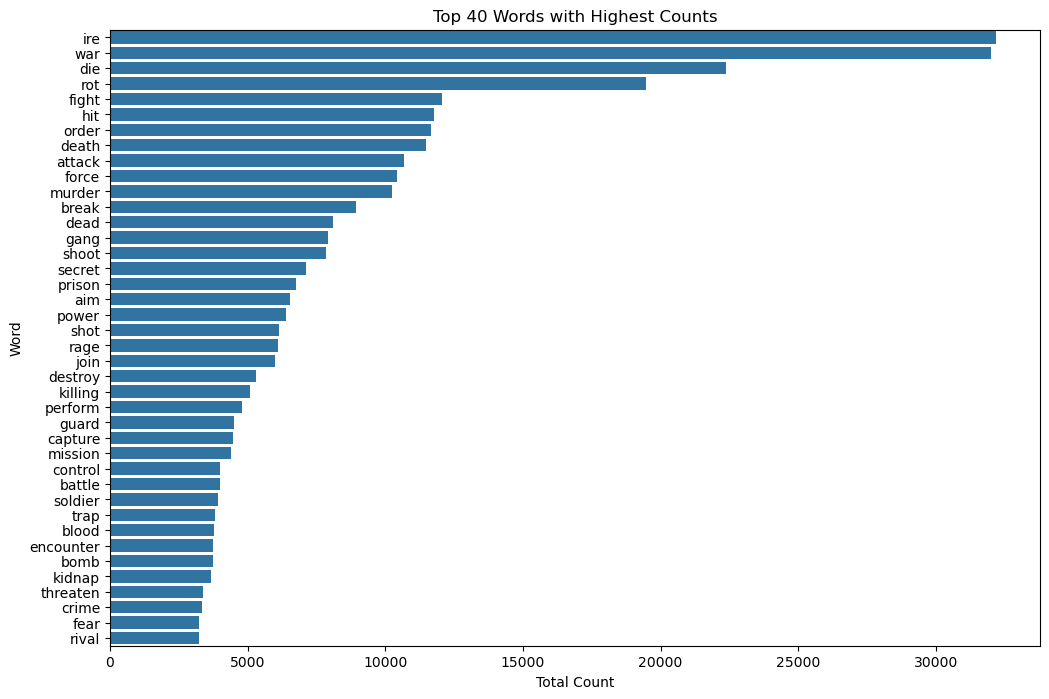

In [8]:
# Sum the word counts across all rows for each word
word_counts_per_column = findings.sum(axis=0)

# Sort the word counts in descending order and select the top N words
top_n_words = 40
top_words = word_counts_per_column.sort_values(ascending=False).head(top_n_words)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=top_words.values, y=top_words.index)
plt.title(f"Top {top_n_words} Words with Highest Counts")
plt.xlabel("Total Count")
plt.ylabel("Word")
plt.show()

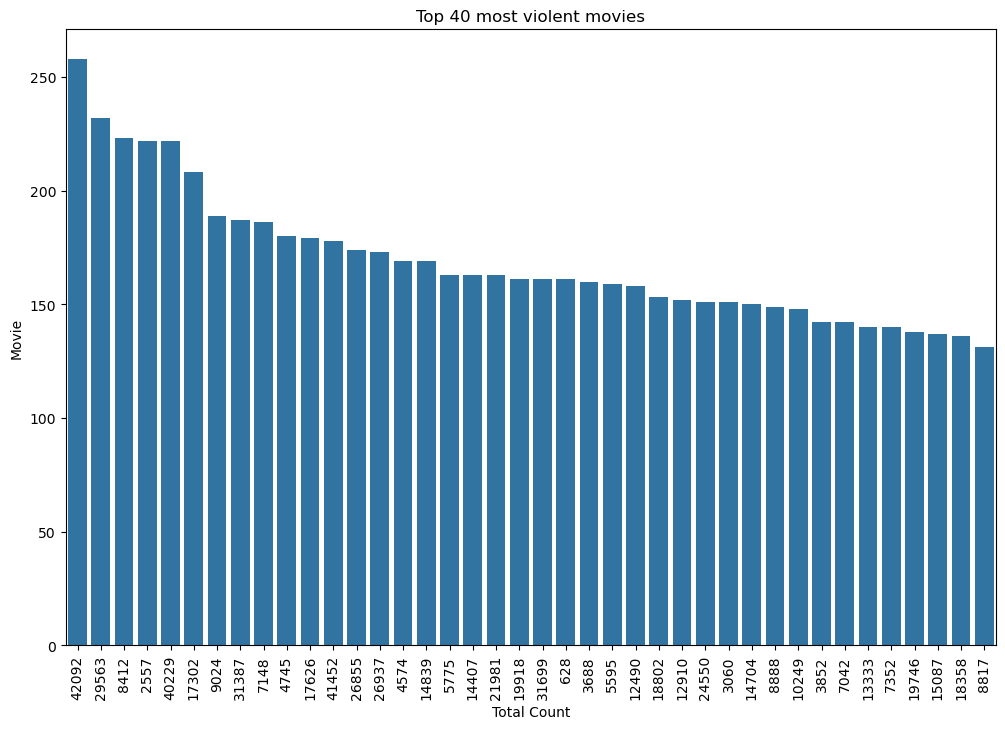

In [9]:
# Most violent movies

word_counts_per_movie = findings.sum(axis=1)

# Sort the word counts in descending order and select the top N movies (most violent)
top_n_movies = 40
top_movies = word_counts_per_movie.sort_values(ascending=False).head(top_n_words)

order = top_movies.index

# vu qu'il ne veut pas collaborer
top_movies = top_movies.reset_index()
top_movies.columns = ['movie id', 'violent words (all) count']

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='movie id', y='violent words (all) count', data=top_movies, order=order)
plt.title(f"Top {top_n_words} most violent movies")
plt.xlabel("Total Count")
plt.ylabel("Movie")
plt.xticks(rotation=90)
plt.show()

## 1: Essayons de faire ça un peu propre

In [6]:
violent_words_list = [
    "acid", "aggressor", "agitator", "aim", "alert", "ambush", "ammunition", "anarchy", "anguish", 
    "annihilate", "apartheid", "arms", "arsenal", "artillery", "assassin", "assassinate", "assault", 
    "atrocity", "attack", "authority", "automatic", "barrage", "barricade", "battle", "battlefield", 
    "belligerent", "betrayal", "blast", "blindside", "blood", "bloody", "bomb", "bombardment", 
    "booby trap", "breach", "break", "brutal", "brutality", "brute", "bullet", "bully", "burn", 
    "cadaver", "camouflage", "campaign", "captive", "capture", "careen", "carnage", "casualties", 
    "cataclysm", "causes", "chaos", "charge", "charred", "checking", "clandestine", "clash", "coalition", 
    "collapse", "combat", "commandos", "concentration", "concussion", "conflagration", "conflict", 
    "confrontation", "conquer", "consequences", "consolidate", "conspiracy", "conspire", "control", 
    "coordinates", "corpse", "counterattack", "countermand", "crash", "crime", "crisis", "cross-hairs", 
    "culpability", "damage", "danger", "dangerous", "dash", "dead", "deadly", "death", "debacle", 
    "deception", "deliberate", "demolish", "demoralize", "despot", "destroy", "destruction", "detect", 
    "detection", "devastation", "device", "dictator", "dictatorship", "die", "disarmament", "disaster", 
    "disastrous", "discipline", "disease", "dispute", "disruption", "dissonance", "division", "domination", 
    "doom", "downfall", "drama", "dread", "encounter", "enemy", "enforce", "engagement", "epithet", 
    "escalate", "excess", "execute", "execution", "expectations", "explode", "exploitation", "explosion", 
    "explosive", "expunge", "extremism", "faction", "fanatic", "fatal", "fear", "fearful", "felon", 
    "ferment", "ferocious", "feud", "fierce", "fiery", "fight", "fighter", "force", "forceful", "forces", 
    "fray", "frenzy", "front lines", "fuel", "fugitive", "furtive", "gang", "gang up on", "gas", 
    "genocide", "germ warfare", "grave", "grenade", "grievous", "groans", "guard", "guerrillas", 
    "guided bombs", "guns", "gunship", "hammering", "harass", "harsh", "hatch", "hate", "hatred", 
    "hazard", "hiding", "hijack", "hijacker", "hit", "hit-and-run", "holocaust", "horror", "hostility", 
    "howitzer", "hurt", "ignite", "impact", "improvise", "incident", "incite", "incontrovertible", 
    "infanticide", "infiltrate", "inflame", "informant", "injuries", "inmate", "insurgent", "insurrection", 
    "intense", "intercept", "interdiction", "international", "interrogation", "intervene", "intimidate", 
    "invasion", "investigate", "investigations", "involvement", "ire", "jail", "jeer", "jets", "join", 
    "kamikaze", "keen", "kidnap", "killing", "knife", "knock-out", "land mines", "laser-activated", 
    "launch", "launcher", "loathsome", "machine guns", "maim", "malevolent", "malicious", "maraud", 
    "march", "massacre", "mayhem", "megalomania", "menace", "militancy", "militant", "militaristic", 
    "military", "militia", "mines", "missile", "mission", "mistreatment", "mob", "mobile", "mobilization", 
    "momentum", "mortars", "munitions", "murder", "muscle", "nationalist", "neutralize", "nightmare", 
    "nitrate", "notorious", "offensive", "officials", "onerous", "operation", "opposition", "order", 
    "out of control", "outbreak", "overrun", "overthrow", "pacify", "partisan", "patrol", "penetrate", 
    "perform", "persecute", "petrify", "photos", "pilot", "pistol", "planes", "plunder", "position", 
    "post-traumatic", "potent", "pound", "powder", "power", "powerful", "preemptive", "premeditate", 
    "prey", "prison", "prisoner", "proliferation", "provocation", "prowl", "pugnacious", "pulverize", 
    "pushing", "quail", "quarrel", "quell", "quiver", "radiation", "radical", "rage", "ravage", "ravish", 
    "rebel", "rebellion", "reconnaissance", "recovery", "recruit", "refugee", "regime", "regiment", 
    "reinforcements", "relentless", "reparation", "reprisal", "reputation", "resistance", "retaliation", 
    "retreat", "retribution", "revenge", "revolution", "ricochet", "rifle", "rift", "riot", "rival", 
    "rocket", "rot", "rounds", "rule", "ruthless", "sabotage", "sacrifice", "salvage", "sanction", 
    "savage", "scare", "score", "scramble", "secrecy", "secret", "sedition", "seize", "seizure", 
    "sensor", "setback", "shelling", "shells", "shock", "shoot", "shot", "showdown", "siege", "skirmish", 
    "slaughter", "smash", "smuggle", "soldier", "special-ops", "specialized", "spy", "spy satellite", 
    "squad", "stalk", "stash", "stealth", "storm", "straggler", "strangle", "strategic", "strategist", 
    "strategy", "strength", "strife", "strike", "strip", "stronghold", "struggle", "subversive", 
    "suffering", "superstition", "supplies", "support", "suppression", "surprise", "surrender", 
    "survival", "survivor", "suspect", "tactics", "tank", "target", "tension", "terror", "terrorism", 
    "terrorist", "terrorize", "threaten", "thug", "thwart", "topple", "torch", "tornado", "torpedo", 
    "tourniquet", "tragic", "training", "trample", "trap", "trauma", "treachery", "trench", "trigger", 
    "triumph", "tsunami", "turbulent", "unbelievable", "unconventional", "unleash", "unruly", 
    "uprising", "urgency", "vagrant", "vanguard", "vanish", "vehicle", "vehicular", "vendetta", 
    "venomous", "vicious", "victory", "vile", "vilify", "violation", "violence", "virulence", "vital", 
    "vitriol", "vociferous", "void", "vow", "vulnerability", "wage", "war", "warheads", "warplane", 
    "warrant", "warrior", "watchdog", "watchful", "weapon", "weather", "well-trained", "wisdom", 
    "worldwide", "wound", "wreckage", "x-ray", "yearn", "yelling", "zeal", "zealot", "zigzag", "zone"
]


In [7]:
#for word in violent_words_list:
#    CMU_plot_summary[f'{word}'] = CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word))

# add the title column for later
CMU_plot_summary = CMU_plot_summary.merge(CMU_movie_metadata[['wikipedia_movie_ID', 'movie_name']], on='wikipedia_movie_ID', how='left')
CMU_plot_summary = CMU_plot_summary.merge(CMU_movie_metadata[['wikipedia_movie_ID', 'movie_genres']], on='wikipedia_movie_ID', how='left')

word_counts = {word: CMU_plot_summary['plot_summary'].apply(lambda x: x.lower().count(word)/len(x.split())) for word in violent_words_list}
word_counts_df = pd.DataFrame(word_counts)
CMU_plot_summary = pd.concat([CMU_plot_summary, word_counts_df], axis=1)

display(CMU_plot_summary)

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,acid,aggressor,agitator,aim,alert,ambush,...,worldwide,wound,wreckage,x-ray,yearn,yelling,zeal,zealot,zigzag,zone
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...",0.0,0.0,0.0,0.002571,0.0,0.001285,...,0.0,0.002571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...",0.0,0.0,0.0,0.006048,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
word_columns = CMU_plot_summary.columns.difference(['wikipedia_movie_ID', 'plot_summary', 'movie_name', 'total_violent_words', 'movie_genres'])

# Sum across columns (per movie) to get the total appearances of all words in each summary
CMU_plot_summary['total_violent_words'] = CMU_plot_summary[word_columns].sum(axis=1)

#  Sum across rows (per word) to get the total appearances of each word across all summaries
first_conclusions = pd.DataFrame()
first_conclusions['total_movies_appearances'] = CMU_plot_summary[word_columns].sum(axis=0)

In [13]:
display(CMU_plot_summary)
display(first_conclusions)

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,acid,aggressor,agitator,aim,alert,ambush,...,wound,wreckage,x-ray,yearn,yelling,zeal,zealot,zigzag,zone,total_violent_words
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...",0.0,0.0,0.0,0.002571,0.0,0.001285,...,0.002571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061697
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...",0.0,0.0,0.0,0.006048,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064516
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031802
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025000
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051527
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012500
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017391


,total_movies_appearances
acid,0.667865
aggressor,0.040393
agitator,0.047649
aim,18.575383
alert,1.407238
...,...
yelling,0.286552
zeal,1.020969
zealot,0.073353
zigzag,0.020643


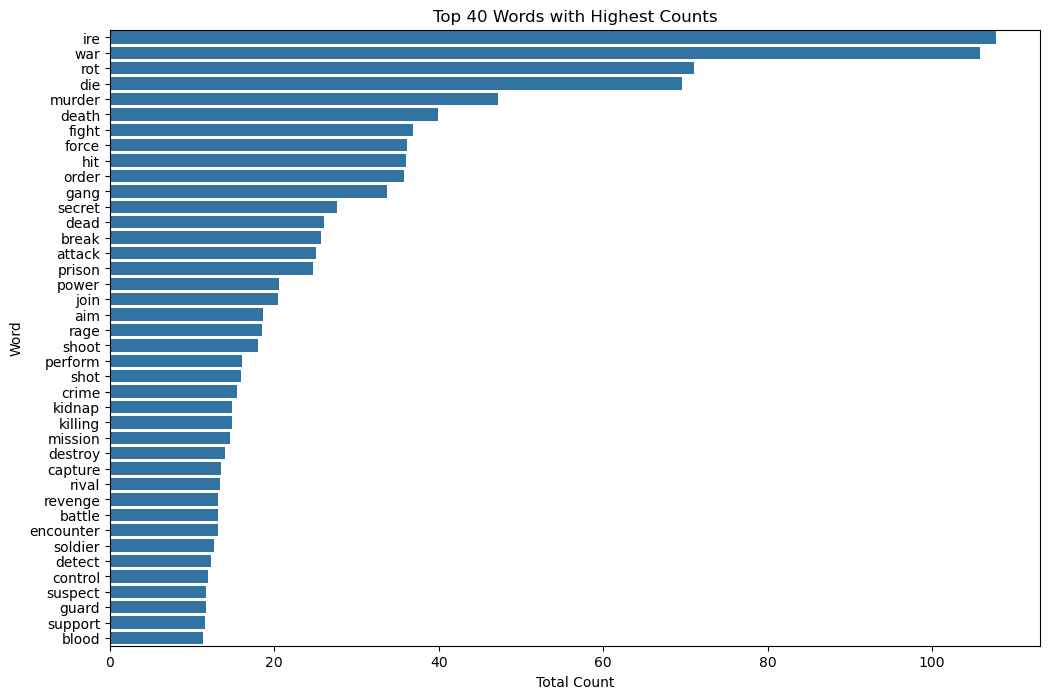

In [14]:
top_n_words = 40
top_words = first_conclusions['total_movies_appearances'].sort_values(ascending=False).head(top_n_words)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=top_words.values, y=top_words.index)
plt.title(f"Top {top_n_words} Words with Highest Counts")
plt.xlabel("Total Count")
plt.ylabel("Word")
plt.show()

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,acid,aggressor,agitator,aim,alert,ambush,...,wound,wreckage,x-ray,yearn,yelling,zeal,zealot,zigzag,zone,total_violent_words
12813,34188375,Former mercenary kidnapping expert hired by a ...,Six Bullets,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000
6334,23923922,"Two men join forces to build a cattle empire, ...",American Empire,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/0hfjk"":...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.352941
10802,25011263,"During the Korean War, a group of American sol...",The Hook,"{""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film""}",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343750
869,14399659,A top secret American forces strategic bomber ...,Midnight Eagle,"{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
6140,31304298,"During the First World War, Russian forces att...",13 Men and a Gun,"{""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film""}",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312500
14812,15502188,"Liberty Horton, an American heiress, is kidnap...",Liberty,"{""/m/06ppq"": ""Silent film"", ""/m/0hfjk"": ""Weste...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.294118
25762,33473147,Three Korean soldiers are faced with a dark pa...,The Showdown,"{""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277778
28305,28749199,A Heiress's life threatened by stalker after h...,Adayalam,"{""/m/02n4kr"": ""Mystery""}",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272727
12333,12494928,The movie about a female detective who is forc...,Stripped to Kill,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272727
30191,22799564,The film follows a hot summer day in the life ...,Ordinary People,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270270


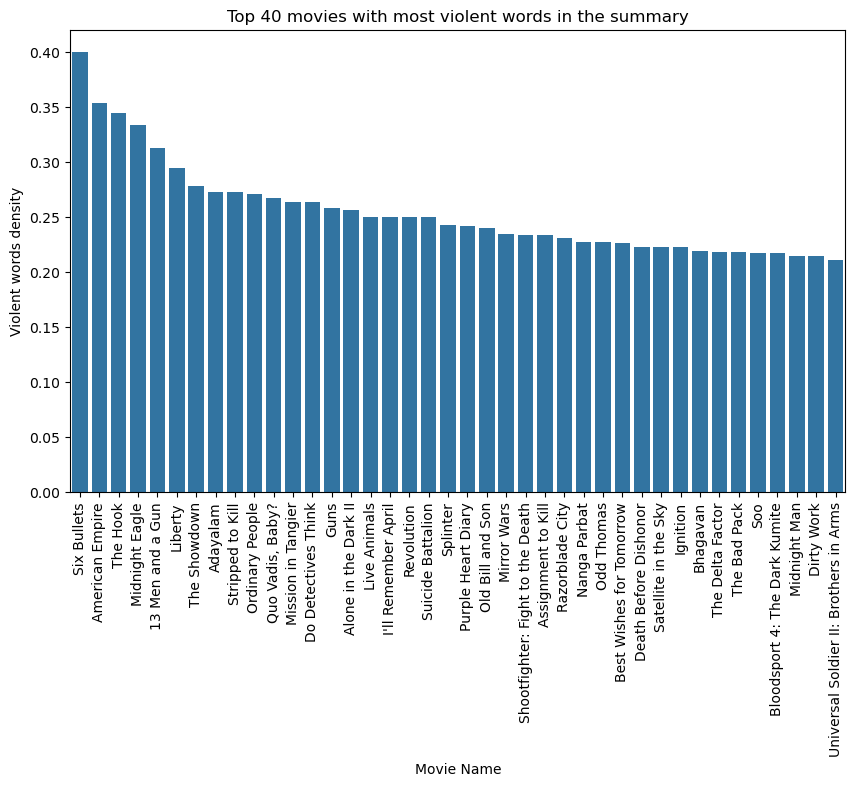

In [19]:

CMU_plot_summary_sorted_by_violent_words = CMU_plot_summary.sort_values(by='total_violent_words', ascending=False)

top_movies = CMU_plot_summary_sorted_by_violent_words.head(40)

display(top_movies)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies['movie_name'], y=top_movies['total_violent_words'], order=top_movies.movie_name) # this order works!!
plt.xlabel("Movie Name")
plt.ylabel("Violent words density")
plt.title("Top 40 movies with most violent words in the summary")
plt.xticks(rotation=90)
plt.show()

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,acid,aggressor,agitator,aim,alert,ambush,...,wound,wreckage,x-ray,yearn,yelling,zeal,zealot,zigzag,zone,total_violent_words
12813,34188375,Former mercenary kidnapping expert hired by a ...,Six Bullets,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000
6334,23923922,"Two men join forces to build a cattle empire, ...",American Empire,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/0hfjk"":...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.352941
10802,25011263,"During the Korean War, a group of American sol...",The Hook,"{""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film""}",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343750
869,14399659,A top secret American forces strategic bomber ...,Midnight Eagle,"{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
6140,31304298,"During the First World War, Russian forces att...",13 Men and a Gun,"{""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film""}",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40094,33486340,Dad Made Dirty Movies chronicles Stephen C. Ap...,"\\""Dad Made Dirty Movies\\""","{""/m/0jtdp"": ""Documentary""}",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116279
6787,31748184,This knockabout English comedy is a spoof on t...,The Vampires of Bloody Island,"{""/m/05p553"": ""Comedy film"", ""/m/03npn"": ""Horr...",0.0,0.0,0.0,0.007752,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116279
2385,105394,"The film, a tongue-in-cheek satire of typical ...",Girlfriend From Hell,"{""/m/01hmnh"": ""Fantasy"", ""/m/03npn"": ""Horror"",...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116279
10052,7185465,Guns and Talks follows a team of four skilled ...,Guns & Talks,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/03q4nz"": ""Wo...",0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116279


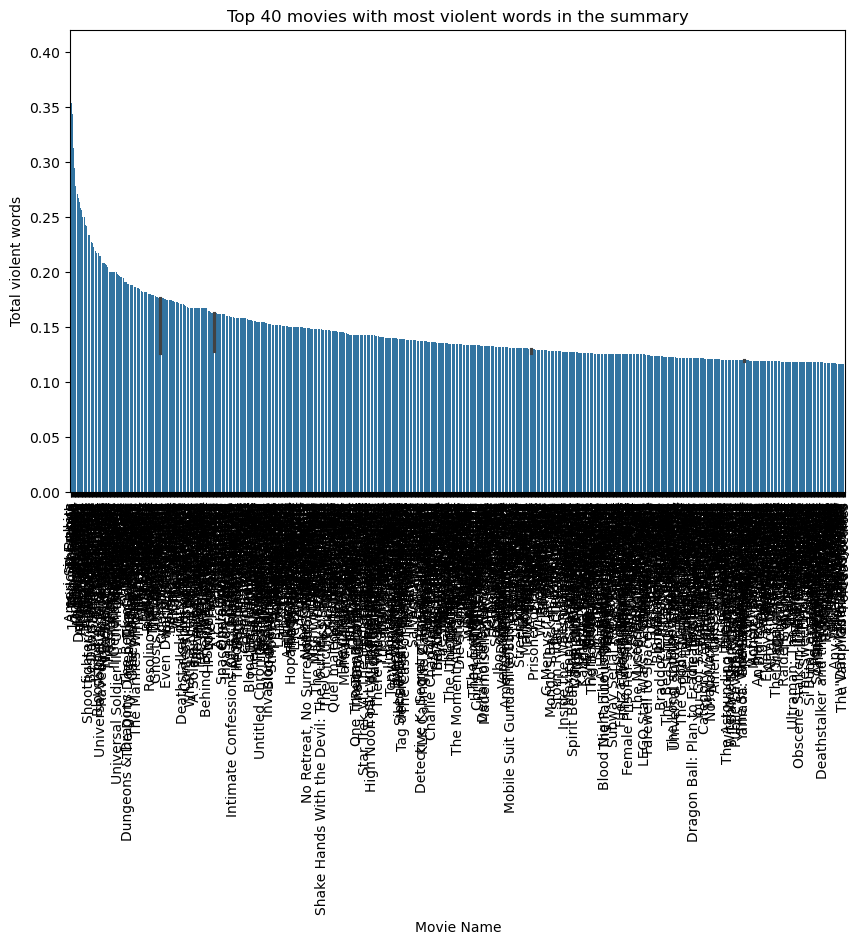

In [17]:

CMU_plot_summary_sorted_by_violent_words = CMU_plot_summary.sort_values(by='total_violent_words', ascending=False)

top_movies = CMU_plot_summary_sorted_by_violent_words.head(1000)

display(top_movies)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies['movie_name'], y=top_movies['total_violent_words'], order=top_movies.movie_name) # this order works!!
plt.xlabel("Movie Name")
plt.ylabel("Total violent words")
plt.title("Top 40 movies with most violent words in the summary")
plt.xticks(rotation=90)
plt.show()

,wikipedia_movie_ID,plot_summary,movie_name,movie_genres,acid,aggressor,agitator,aim,alert,ambush,...,wound,wreckage,x-ray,yearn,yelling,zeal,zealot,zigzag,zone,total_violent_words
9416,28164962,<ref namehttp://www2u.biglobe.ne.jp/~p-g/data/...,Three Naked Sisters: Lewdness,"{""/m/0gw5n2f"": ""Japanese Movies""}",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3902,34985175,This tale depicts the relationship between the...,HM HM,"{""/m/02hmvc"": ""Short Film"", ""/m/0hcr"": ""Animat...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18552,28178332,A head waiter in a country hotel works various...,Small Hotel,"{""/m/05p553"": ""Comedy film""}",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27026,1802864,"The film is centered on Spencer , who moves to...",According to Spencer,"{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39042,33175534,"Set in the year 1980, the Enterprise explores ...",Steam Trek: The Moving Picture,"{""/m/02hmvc"": ""Short Film"", ""/m/068twy"": ""Fan ...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14705,36353254,The movie revolves around four young men who a...,The Reunion,"{""/m/05p553"": ""Comedy film""}",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7211,22781881,The film follows the formative years of Vladi...,A Mother's Heart,{},0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36431,4837697,Koi Tujh Sa Kahan revolves around a loving hus...,Koi Tujh Sa Kahan,"{""/m/07s9rl0"": ""Drama""}",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7221,34952810,Fatma is old and lame. She has worked all her ...,Fatma,"{""/m/02hmvc"": ""Short Film""}",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


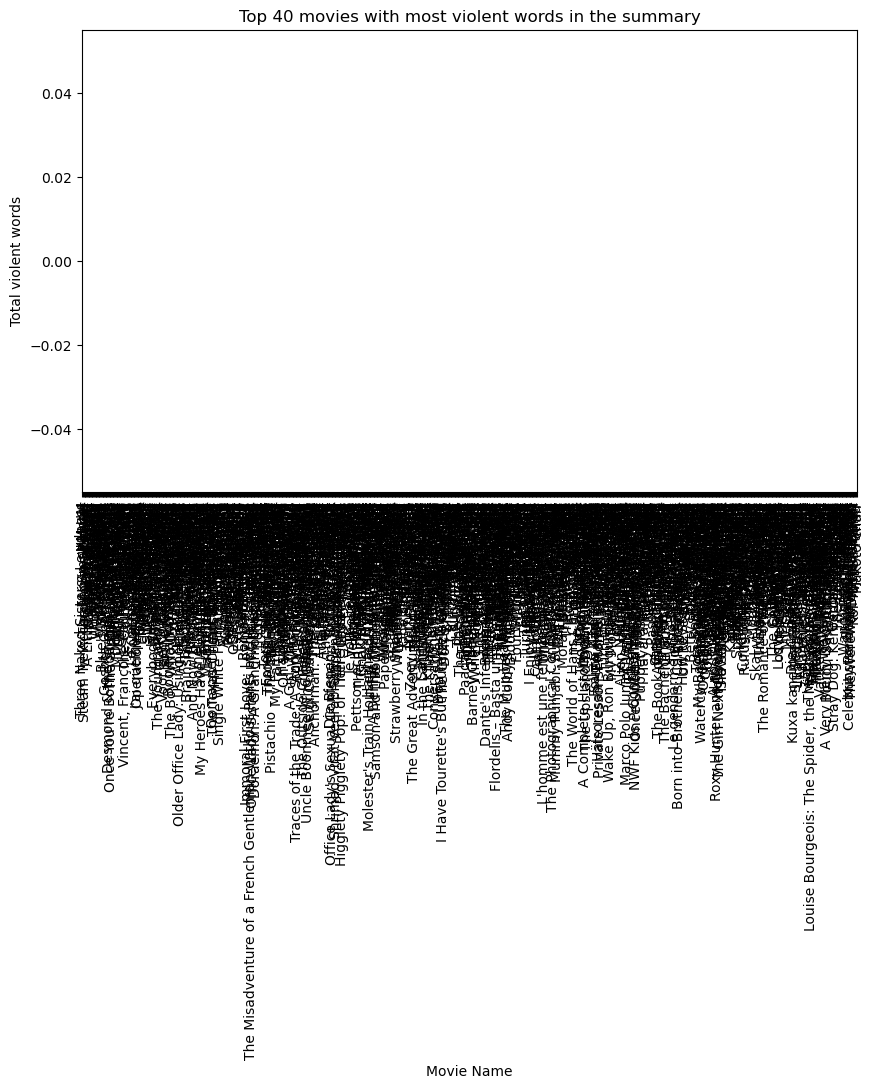

In [18]:
CMU_plot_summary_sorted_by_violent_words = CMU_plot_summary.sort_values(by='total_violent_words', ascending=True)

top_movies = CMU_plot_summary_sorted_by_violent_words.head(1000)

display(top_movies)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies['movie_name'], y=top_movies['total_violent_words'], order=top_movies.movie_name) # this order works!!
plt.xlabel("Movie Name")
plt.ylabel("Total violent words")
plt.title("Top 40 movies with most violent words in the summary")
plt.xticks(rotation=90)
plt.show()

## 2: New investigation: let's look at psychological violence

In [4]:
psycho_violence_list = [
    "verbal abuse",
    "name-calling",
    "yelling",
    "shouting",
    "threats",
    "constant criticism",
    "gaslighting",
    "denying reality",
    "minimizing feelings",
    "projecting blame",
    "withholding information",
    "manipulation",
    "mind games",
    "guilt-tripping",
    "love-bombing",
    "silent treatment",
    "stonewalling",
    "ignoring",
    "shutting down",
    "avoidance",
    "isolation",
    "financial abuse",
    "coercive control",
    "damage to property",
    "stalking",
    "body shaming",
    "sleep deprivation",
    "overprotection",
    "triangulation",
    "normalizing abuse",
    "hoovering",
    "word salad",
    "walking on eggshells",
    "emotional blackmail",
    "intimidation",
    "humiliation",
    "belittling",
    "mocking",
    "sarcasm",
    "patronizing",
    "jealousy",
    "possessiveness",
    "controlling behavior",
    "emotional neglect",
    "invalidating emotions",
    "unpredictable outbursts",
    "public embarrassment",
    "ultimatums",
    "victim blaming",
    "emotional withholding"
]

In [6]:
# Define the pattern for the parsing
pattern_psycho = r'\b(?:' + '|'.join(psycho_violence_list) + r')\b'

# Lower case the plot_summaries
CMU_plot_summary['plot_summary'] = CMU_plot_summary['plot_summary'].str.lower()

# Count the number of violent words from the psycho_violence_list in the plot_summary for each movie
CMU_plot_summary['total_psycho_vio_words'] = CMU_plot_summary['plot_summary'].str.count(pattern_psycho)

# Count the number of words in each plot summary
CMU_plot_summary['n_words_summary'] = CMU_plot_summary['plot_summary'].str.split().str.len()

# Calculate the "psychological violent words density" by dividing the violent words count by the number of words in the plot summary for each movie
CMU_plot_summary['total_psycho_vio_words_density'] = CMU_plot_summary['total_psycho_vio_words'] / CMU_plot_summary['n_words_summary']

display(CMU_plot_summary)

,wikipedia_movie_ID,plot_summary,total_psycho_vio_words,n_words_summary,total_psycho_vio_words_density
0,23890098,"shlykov, a hard-working taxi driver and lyosha...",0,25,0.000000
1,31186339,the nation of panem consists of a wealthy capi...,1,778,0.001285
2,20663735,poovalli induchoodan is sentenced for six yea...,0,496,0.000000
3,2231378,"the lemon drop kid , a new york city swindler,...",0,849,0.000000
4,595909,seventh-day adventist church pastor michael ch...,0,397,0.000000
...,...,...,...,...,...
42298,34808485,"the story is about reema , a young muslim scho...",0,40,0.000000
42299,1096473,"in 1928 hollywood, director leo andreyev look...",0,524,0.000000
42300,35102018,american luthier focuses on randy parsons’ tra...,0,160,0.000000
42301,8628195,"abdur rehman khan , a middle-aged dry fruit se...",0,230,0.000000


In [9]:
# Add the movie titles and the genres
CMU_plot_summary = CMU_plot_summary.merge(CMU_movie_metadata[['wikipedia_movie_ID', 'movie_name', 'movie_genres']], on='wikipedia_movie_ID', how='left')

# sort the movies according to their violent words density in the plot summary
CMU_movies_sorted_psycho = CMU_plot_summary.sort_values(by='total_psycho_vio_words_density', ascending=False)
display(CMU_movies_sorted_psycho)

,wikipedia_movie_ID,plot_summary,total_psycho_vio_words,n_words_summary,total_psycho_vio_words_density,movie_name,movie_genres
2791,10396322,jealousy comes between a couple when the wife ...,1,18,0.055556,Young Man of Manhattan,"{""/m/02l7c8"": ""Romance Film"", ""/m/01z4y"": ""Com..."
19908,7383485,a police sergeant and a parole officer endeavo...,1,28,0.035714,Terror Among Us,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/028v3"": ""Det..."
9813,26427993,between floors focuses on five stuck elevators...,1,29,0.034483,Between Floors,"{""/m/0219x_"": ""Indie""}"
1996,9448041,"a slightly neurotic architecture student, ezeq...",3,91,0.032967,El Fondo del Mar,"{""/m/01jfsb"": ""Thriller"", ""/m/0219x_"": ""Indie""..."
29688,24389074,{{expand section}} a beautiful but frustrated ...,1,32,0.031250,The Beloved,"{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...
14457,26435363,http://www.bloody-disgusting.com/news/12837|ti...,0,188,0.000000,La horde,"{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""..."
14458,10826329,leo gogarty marries margaud morgan after a w...,0,98,0.000000,Living in a Big Way,"{""/m/02l7c8"": ""Romance Film"", ""/m/04t36"": ""Mus..."
14459,6703160,"in 1465, honorable but penniless scottish knig...",0,531,0.000000,The Adventures of Quentin Durward,"{""/m/02qvnvs"": ""Swashbuckler films"", ""/m/03k9f..."
14460,15418729,babs flynn is the manager of a liverpool bout...,0,78,0.000000,Business as Usual,"{""/m/07s9rl0"": ""Drama"", ""/m/0219x_"": ""Indie""}"


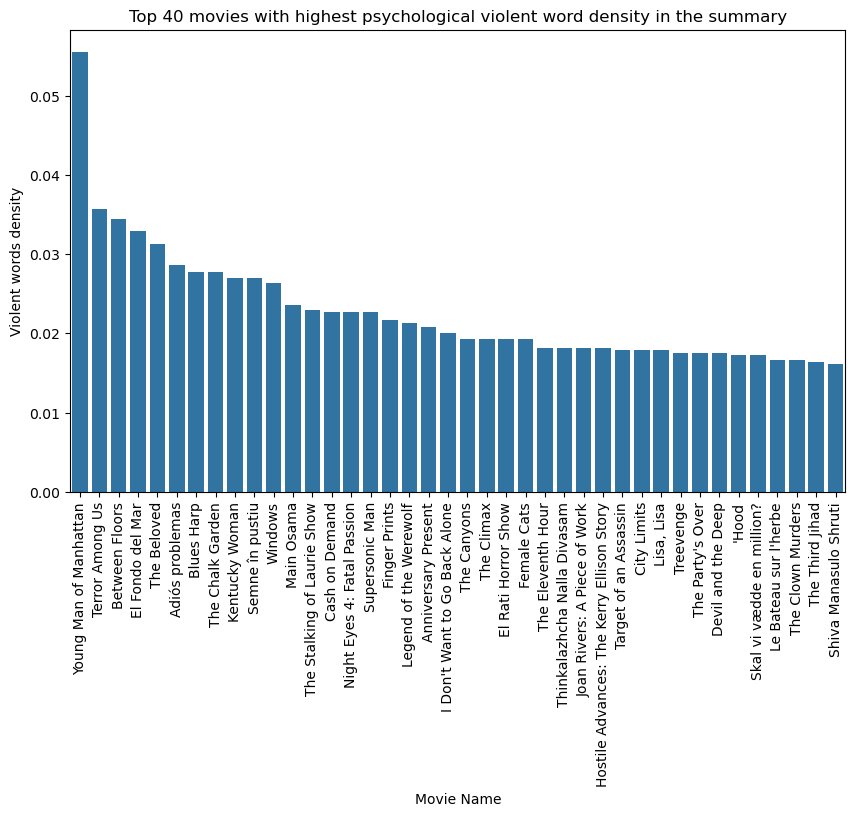

In [10]:
# Plot the results

top_movies = CMU_movies_sorted_psycho.head(40)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies['movie_name'], y=top_movies['total_psycho_vio_words_density'])
plt.xlabel("Movie Name")
plt.ylabel("Violent words density")
plt.title("Top 40 movies with highest psychological violent word density in the summary")
plt.xticks(rotation=90)
plt.show()

In [19]:
print(top_movies['movie_genres'])


2791     {"/m/02l7c8": "Romance Film", "/m/01z4y": "Com...
19908    {"/m/0lsxr": "Crime Fiction", "/m/028v3": "Det...
9813                                {"/m/0219x_": "Indie"}
1996     {"/m/01jfsb": "Thriller", "/m/0219x_": "Indie"...
29688                              {"/m/07s9rl0": "Drama"}
40365    {"/m/02l7c8": "Romance Film", "/m/01g6gs": "Bl...
34015    {"/m/0lsxr": "Crime Fiction", "/m/0gw5n2f": "J...
41939      {"/m/02n4kr": "Mystery", "/m/07s9rl0": "Drama"}
42132                              {"/m/07s9rl0": "Drama"}
23399    {"/m/02hmvc": "Short Film", "/m/07s9rl0": "Dra...
34169    {"/m/01jfsb": "Thriller", "/m/0hn10": "LGBT", ...
9018                                                    {}
31511                            {"/m/01jfsb": "Thriller"}
2587     {"/m/01jfsb": "Thriller", "/m/0lsxr": "Crime F...
34738    {"/m/01jfsb": "Thriller", "/m/07s9rl0": "Drama...
31117    {"/m/0hj3n2k": "Fantasy Adventure", "/m/06n90"...
28178    {"/m/0lsxr": "Crime Fiction", "/m/02kdv5l": "A.